# nlp100本ノック
## 第4章：形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．



In [3]:
import MeCab
tagger = MeCab.Tagger()
print(tagger.parse("吾輩は猫である。"))

吾輩	代名詞,,,,,,ワガハイ,我が輩,吾輩,ワガハイ,吾輩,ワガハイ,混,"","","","","","",体,ワガハイ,ワガハイ,ワガハイ,ワガハイ,"0","","",11321954766299648,41189
は	助詞,係助詞,,,,,ハ,は,は,ワ,は,ワ,和,"","","","","","",係助,ハ,ハ,ハ,ハ,"","動詞%F2@0,名詞%F1,形容詞%F2@-1","",8059703733133824,29321
猫	名詞,普通名詞,一般,,,,ネコ,猫,猫,ネコ,猫,ネコ,和,"","","","","","",体,ネコ,ネコ,ネコ,ネコ,"1","C4","",7918141678166528,28806
で	助動詞,,,,助動詞-ダ,連用形-一般,ダ,だ,で,デ,だ,ダ,和,"","","","","","",助動,デ,ダ,デ,ダ,"","名詞%F1","",6299110739157633,22916
ある	動詞,非自立可能,,,五段-ラ行,終止形-一般,アル,有る,ある,アル,ある,アル,和,"","","","","","",用,アル,アル,アル,アル,"1","C3","",334260158472875,1216
。	補助記号,句点,,,,,,。,。,,。,,記号,"","","","","","",補助,,,,,"","","",6880571302400,25
EOS



In [4]:
import MeCab
mecab = MeCab.Tagger()
with open("neko.txt", "r") as f1, open("neko.txt.mecab", "w") as f2:
    lines = f1.readlines()
    for line in lines:
        line = line.replace('\n', '')
        result = mecab.parse(line)
        f2.write(result)

### p30.形態素解析結果の読み込み

In [5]:
with open("neko.txt.mecab", "r") as f:
  general_list = []
  neko_list = []
  lines = f.readlines()
  for text in lines:
    neko_dic = {}
    suf = text.split("\t")
    if suf[0] == "EOS\n":
      continue
    temp = suf[1].split(',')
    neko_dic["surface"] = suf[0]
    if len(temp) <= 7:
      neko_dic["base"] = suf[0]
    else:
      neko_dic["base"] = temp[7]
    neko_dic["pos"] = temp[0]
    neko_dic["pos1"] = temp[1]
    neko_list.append(neko_dic)
    if suf[0]=="。":
      general_list.append(neko_list)
      neko_list = []
general_list #今後の問題で使います


[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
  {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''},
  {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': '未だ', 'pos': '副詞', 'pos1': ''},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
  {'surface': 'どこ', 'base': '何処', 'pos': '代名詞', 'pos1': ''},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞

### p31.動詞

In [6]:
suf_ver = []
for text in general_list:
    for word in text:
        if word["pos"] == '動詞':
            suf_ver.append(word["surface"])

print(suf_ver)

['ある', '生れ', 'つか', 'し', '泣い', 'い', 'し', 'いる', '始め', 'いう', '見', '聞く', 'いう', 'あっ', 'いう', '捕え', '煮', '食う', 'いう', 'ある', 'いう', '思わ', '載せ', '持ち上げ', 'し', 'あっ', 'ある', '落ちつい', '見', 'いう', '見', 'あろう', '思っ', '残っ', 'いる', 'もっ', 'さ', 'し', '逢っ', '出会わし', 'し', 'いる', 'し', '吹く', '咽せ', '弱っ', '飲む', 'いう', 'ある', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'し', '出', 'し', 'いる', '考え出そう', 'し', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', '這い出し', '見る', '棄て', 'ある', '這い出す', 'ある', '坐っ', 'し', '考え', '見', 'いう', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', '暮れかかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', '廻り', '始め', 'し', '這っ', '行く', '出', '這入っ', 'なる', '思っ', '崩れ', 'もぐり込ん', '破れ', 'い', 'し', '知れ', 'ある', '云っ', '至る', 'する', 'なっ', 'いる', '忍び込ん', 'し', '分ら', 'なる', '減る', 'し', '降っ', '来る', 'いう', '出来', 'なっ', 'あるい', '行く', '考える', '這入っ', 'おっ', '見る', 'し', 'ある', '逢っ', 'ある', '見る', 'つかん', '抛り出し', '思っ', 'ねぶっ', '任せ', 'い', 'し', '出来', '見', '這い上っ', 'する', '投げ出さ', '投げ出さ', '這い上り',

### p32.動詞の基本形

In [7]:
base_ver = []
for text in general_list:
    for word in text:
        if word["pos"] == '動詞':
            base_ver.append(word["base"])

print(base_ver)

['有る', '生まれる', '付く', '為る', '泣く', '居る', '為る', '居る', '始める', '言う', '見る', '聞く', '言う', '有る', '言う', '捕らえる', '煮る', '食う', '言う', '有る', '言う', '思う', '乗せる', '持ち上げる', '為る', '有る', '有る', '落ち着く', '見る', '言う', '見る', '有る', '思う', '残る', '居る', '持つ', '為る', '為る', '会う', '出会わす', '為る', '居る', '為る', '吹く', '噎せる', '弱る', '飲む', '言う', '有る', '知る', '座る', '居る', '為る', '為る', '始める', '動く', '動く', '分かる', '回る', '成る', '助かる', '思う', '居る', '為る', '出る', '為る', '居る', '考え出す', '為る', '分かる', '付く', '見る', '居る', '居る', '見える', '隠す', '仕舞う', '違う', '明く', '居る', '這い出す', '見る', '捨てる', '有る', '這い出す', '有る', '座る', '為る', '考える', '見る', '言う', '出る', '為る', '泣く', '来る', '呉れる', '考え付く', '遣る', '見る', '来る', '渡る', '暮れ掛かる', '減る', '来る', '泣く', '出る', '有る', '有る', '為る', '回る', '始める', '為る', '這う', '行く', '出る', '入る', '成る', '思う', '崩れる', '潜り込む', '破れる', '居る', '為る', '知れる', '有る', '言う', '至る', '為る', '成る', '居る', '忍び込む', '為る', '分かる', '成る', '減る', '為る', '降る', '来る', '言う', '出来る', '成る', '歩く', '行く', '考える', '入る', '居る', '見る', '為る', '有る', '会う', '有る', '見る', '掴む', '放り出す', '思う', '舐る', '任せる', '居る', '為る

### p.33.「AのB」

In [8]:
no_noun = []
for text in general_list:
    for i in range(len(text)):
        if text[i-1]['pos'] == '名詞' and text[i]['surface'] == 'の' and text[i+1]['pos'] == '名詞':
            no_noun.append(text[i-1]['surface'] + 'の' + text[i+1]['surface'])
print(no_noun)

['掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '藁の上', '笹原の中', '池の前', '一樹の蔭', '垣根の穴', '隣家の三毛', '時の通路', '一刻の猶予', '家の内', '以外の人間', '前の書生', '胸の痞', '家の主人', '主人の方', 'なしの小猫', '鼻の下', '自分の住家', '家のもの', 'うちのもの', '本の上', '皮膚の色', '本の上', '以外のもの', '主人の傍', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'うちの小供', '小供の寝床', '小供の一人', '例の神経', '次の部屋', '自分の勝手', 'へっついの中', '台所の板の間', '家の書生', '裏の池', '親子の愛', '隣りの三毛', '目刺の頭', '鰡の臍', '軍人の家', '代言の主人', '教師の家', '猫の時節', '家の主人', '胃弱の癖', '後架の中', '平の宗盛', '月の月給', '主人の述懐', '金縁の眼鏡', '主人の顔', '室内の想像', '訳のもの', '利の大家', '金縁の裏', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '人の気', '自己の力量', '人間の不徳', '家の裏', 'うちの小供', '日の二', 'たこの茶園', '茶の木', '木の根', '西側の杉垣', '杉垣のそば', '他の庭内', '皮膚の上', '柔毛の間', '嘆賞の念', '好奇の心', '小春の風', '杉垣の上', '梧桐の枝', '枯菊の茂み', '真丸の眼', '人間の珍重', '双眸の奥', '額の上', '声の底', '教師の家', '良家の猫', '車屋の黒', '車屋の黒', '主義の的', '軽侮の念', '左の問答', '車屋の方', 'うちの主人', '車屋の猫', '教師の方', '腹の足し', '車屋の黒', '相当の気焔', '茶畠の中', '黒の比較', '鼻の先', '自分の手柄', '墻壁の欠', '鼠の百', '掃除の時', 'うちの亭主', '石灰の袋',

### p.34名詞の連接

In [9]:
noun_list = []
for text in general_list:
    count = 0
    word = ""
    for i in range(len(text)):
        if text[i]['pos'] == '名詞':
            count += 1
            word += text[i]['surface']
        else:
            if count >= 2:
                noun_list.append(word)
            count = 0
            word = ""

print(noun_list)


['時妙', '一毛', '後猫', '一度', '上今', 'うち池の上', '左り', '書生以外', '宿なし', 'まま奥', '終日書斎', '時々忍び足', '淡黄色', '二三ページ', '主人以外', '朝主人', '椽側', '一間', '神経胃弱', '時々同衾', '言語同断', '家内総がかり', '先日玉', '一部始終', '新体詩', '後架先生', '一月', '月給日', '水彩絵具', '毎日毎日書斎', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア', '星辰あり', '禽あり', '金魚あり', '寒鴉あり', '一幅', '椽側', '一分', '淡灰色', '今主人', '上不思議', '盲猫', 'いくらアンドレア', '一分', 'あと大', '馬鹿野郎', '馬鹿野郎', '馬鹿野郎呼わり', '馬鹿野郎', 'みんな増長', '数倍', '十坪', '腹加減', '二時頃', '前後不覚', '少々言葉', '乱暴猫', '同盟敬遠主義', 'ゆき感じ', '少々軽侮', '車屋相当', '不徳事件', '日例', '自慢話し', '手柄話', '年が年', '一度いたち', '最後っ屁', '百年', '五銭', '壱円五十銭', '少々気味', '鼠以外', '水彩画', '十二月一日', '水彩画', '水彩画家', '水彩画', '通人論', '水彩画', '主人はかく', '十二月四', '水彩画', '通り下手', '水彩画', '水彩画家', '水彩画', '翌日例', '金縁眼鏡', '結果今日', 'アンドレア', '椽側', 'サルト事件', '時々冗談', '仏国革命', '日本文学会', '演説会', '百名', '歴史小説セオファーノ', '歴史小説', '女主人', '神経胃弱', '時ゃ別', '模様画', '実際奇警', '半分降参', '後跛', '最後屁', '天秤棒', '二三段', '三間半', '椽側', '毎日学校', '元朝早々主人', '絵端書', '交友某画家', '深緑り', '一応感服', '三世相', '絵端書', '絵端書', 'いくら猫', '一列一体', '自家固有', '張り具合', '垂れ加減', '粋無粋', '千差万別

### p.35単語の出現頻度

In [10]:
import collections

word_list = []
for text in general_list:
    for word in text:
        word_list.append(word['surface'])
    
tmp = collections.Counter(word_list)
answer = tmp.most_common()
print(answer)

[('の', 9550), ('。', 7486), ('て', 7416), ('に', 7017), ('、', 6773), ('は', 6500), ('と', 6160), ('を', 6119), ('が', 5399), ('で', 4537), ('た', 3988), ('も', 3253), ('「', 3238), ('」', 3238), ('だ', 2719), ('し', 2536), ('ない', 2422), ('から', 2217), ('か', 2050), ('ある', 1726), ('ん', 1662), ('な', 1614), ('いる', 1255), ('事', 1212), ('する', 1055), ('もの', 1004), ('へ', 995), ('です', 977), ('君', 971), ('云う', 937), ('主人', 934), ('何', 715), ('御', 707), ('ね', 693), ('よう', 683), ('—', 666), ('この', 655), ('その', 620), ('それ', 612), ('ば', 600), ('そう', 570), ('い', 552), ('なる', 538), ('よ', 498), ('一', 490), ('なら', 486), ('人', 486), ('吾輩', 481), ('さ', 480), ('これ', 472), ('ます', 462), ('じゃ', 447), ('…', 433), ('どう', 413), ('\u3000', 411), ('なっ', 408), ('さん', 401), ('来', 383), ('ところ', 383), ('見', 366), ('時', 351), ('ず', 345), ('迷亭', 343), ('って', 333), ('ませ', 333), ('方', 321), ('いい', 319), ('なく', 313), ('まで', 312), ('れ', 304), ('上', 298), ('寒月', 286), ('まし', 283), ('人間', 279), ('顔', 277), ('先生', 274), ('見る', 273), ('ぬ', 27

### p.36頻度上位10語

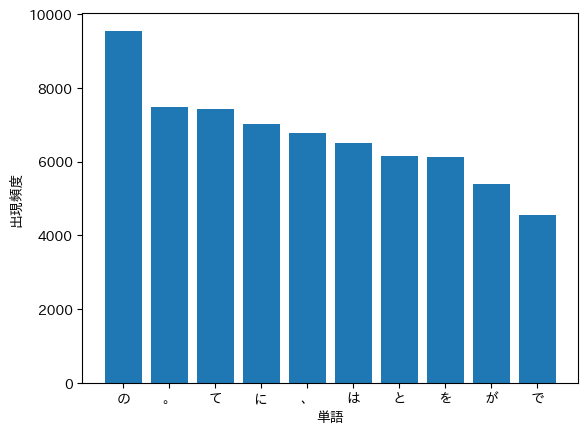

In [11]:
import matplotlib.pyplot as plt
import japanize_matplotlib

over10 = answer[:10]
x = []
y = []
for word in over10:
    x.append(word[0])
    y.append(word[1])

plt.bar(x, y)
plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.show()

### p.37「猫」と共起頻度の高い上位10単語

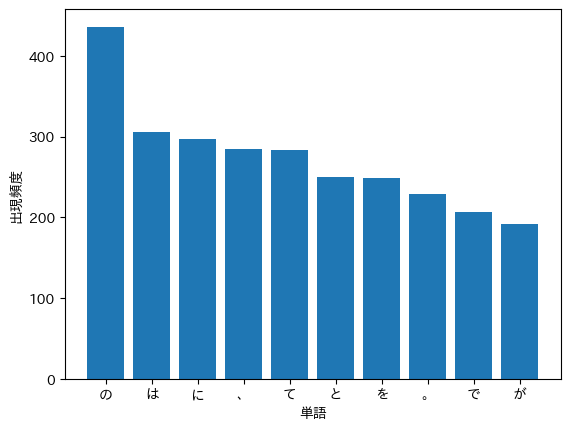

In [18]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import collections

neko_list = []
for text in general_list:
    Flag = 0
    neko_words = []
    for word in text:
        if "猫" in word["surface"]:
            Flag = 1
            continue
        neko_words.append(word["surface"])
    if Flag == 1:
        neko_list.extend(neko_words)

tmp = collections.Counter(neko_list)
answer = tmp.most_common()
over10 = answer[:10]
x = []
y = []
for word in over10:
    x.append(word[0])
    y.append(word[1])

plt.bar(x, y)
plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.show()

### p.38ヒストグラム

(array([6.608e+03, 2.272e+03, 1.126e+03, 6.630e+02, 5.130e+02, 3.250e+02,
        2.850e+02, 2.100e+02, 1.400e+02, 1.190e+02, 1.080e+02, 1.030e+02,
        1.010e+02, 9.100e+01, 6.300e+01, 6.800e+01, 5.900e+01, 6.300e+01,
        3.700e+01, 4.400e+01, 3.100e+01, 3.000e+01, 3.000e+01, 3.500e+01,
        3.400e+01, 2.500e+01, 2.200e+01, 2.400e+01, 1.900e+01, 1.700e+01,
        1.300e+01, 1.700e+01, 1.300e+01, 1.100e+01, 2.200e+01, 1.300e+01,
        9.000e+00, 1.000e+01, 1.400e+01, 2.000e+01, 1.500e+01, 9.000e+00,
        3.000e+00, 1.100e+01, 7.000e+00, 5.000e+00, 8.000e+00, 9.000e+00,
        6.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 5.000e+00, 8.000e+00,
        5.000e+00, 4.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 5.000e+00,
        4.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 8.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 6.000e+00,
        7.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 4.000e+00, 1.000e+0

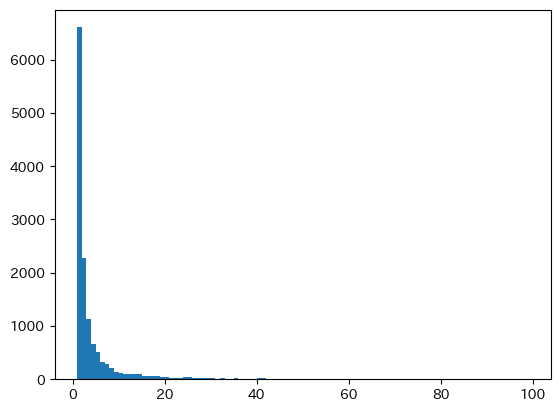

In [21]:
import matplotlib.pyplot as plt

word_list = []
for text in general_list:
    for word in text:
        word_list.append(word['surface'])

tmp = collections.Counter(word_list)
plt.hist(tmp.values(), range(1,100))

### p.39Zipfの法則

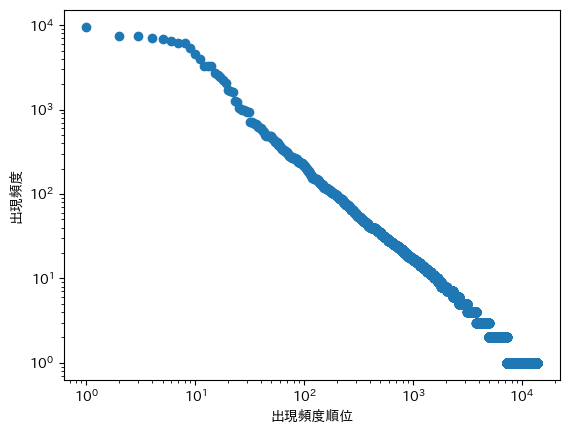

In [26]:
import matplotlib.pyplot as plt

word_list = []
for text in general_list:
    for word in text:
        word_list.append(word['surface'])

tmp = collections.Counter(word_list)
tmp2 = sorted((tmp.values()), reverse = True)

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter(range(1, len(tmp2)+1), tmp2)
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()